In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import datetime
from pandas import Series
import seaborn as sns
%matplotlib inline
import warnings
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
warnings.filterwarnings("ignore")

In [2]:
# Reading the data
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [3]:
# Copy of original data
train_original = train.copy()
test_original = test.copy()

In [4]:
# Checking data
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [5]:
# Converting to datetime format
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')

In [6]:
# Start and end date for train
train['Datetime'].min(),train['Datetime'].max()

(Timestamp('2012-08-25 00:00:00'), Timestamp('2014-09-25 23:00:00'))

In [7]:
# Start and end date for test
test['Datetime'].min(),test['Datetime'].max()

(Timestamp('2014-09-26 00:00:00'), Timestamp('2015-04-26 23:00:00'))

In [8]:
# Creating new features
for i in (train, test, test_original):
    i['year'] = i.Datetime.dt.year 
    i['month'] = i.Datetime.dt.month 
    i['day'] = i.Datetime.dt.day
    i['Hour'] = i.Datetime.dt.hour

In [9]:
# weekend variable
train['day of week']=train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [10]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2

In [11]:
train.head()

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


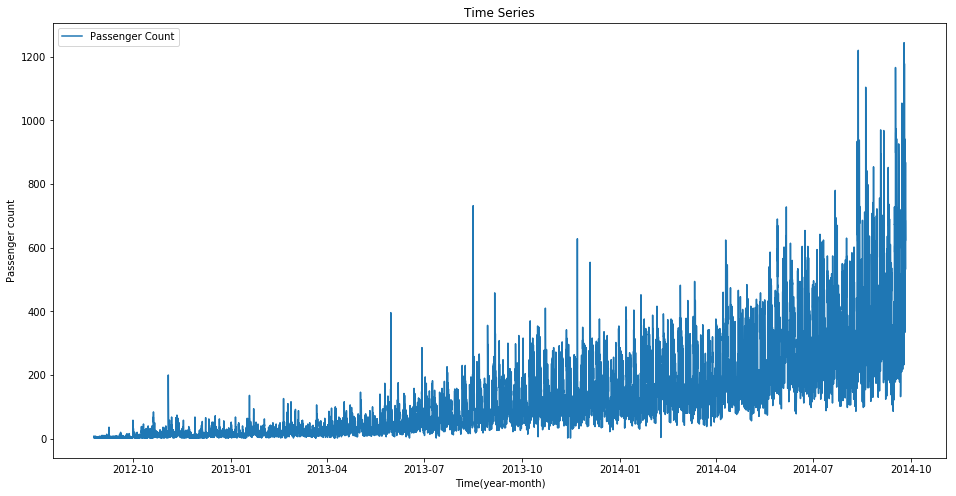

In [12]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis.
df = train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis.
ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')

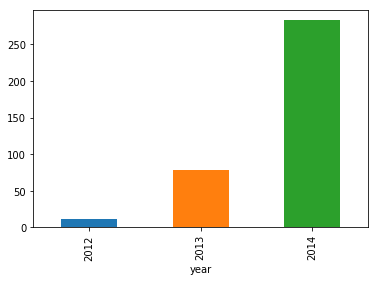

In [13]:
# Year wise count
train.groupby('year')['Count'].mean().plot.bar()

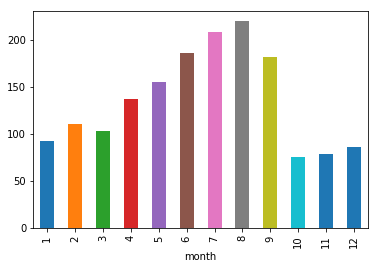

In [14]:
# Month wise count
train.groupby('month')['Count'].mean().plot.bar()

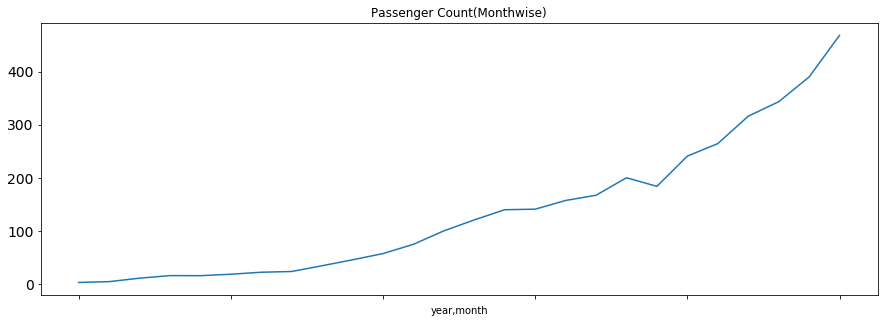

In [15]:
temp = train.groupby(['year', 'month'])['Count'].mean()
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

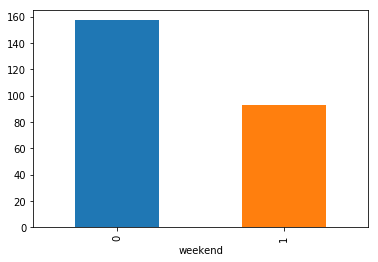

In [16]:
# Count on weekend
train.groupby('weekend')['Count'].mean().plot.bar()

In [17]:
# Droping ID from train
train = train.drop('ID',1)

In [18]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

# Hourly time series
hourly = train.resample('H').mean()

# Converting to daily mean
daily = train.resample('D').mean()

# Converting to weekly mean
weekly = train.resample('W').mean()

# Converting to monthly mean
monthly = train.resample('M').mean()

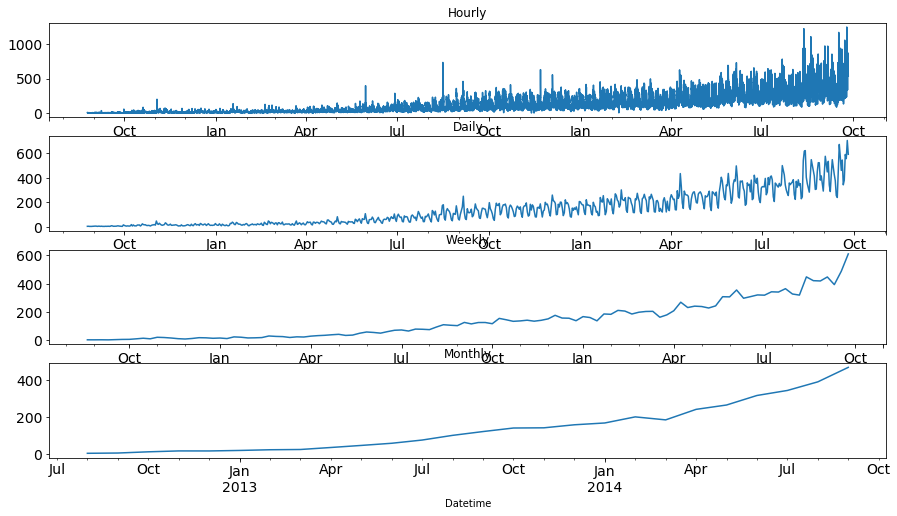

In [21]:
fig, axs = plt.subplots(4,1)

hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3])

plt.show()

In [22]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 

# Converting to daily mean
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

# Converting to daily mean
train = train.resample('D').mean()

In [23]:
train.head()

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


In [24]:
# Training and Validation data split

Train=train.ix['2012-08-25':'2014-06-24']
valid=train.ix['2014-06-25':'2014-09-25']

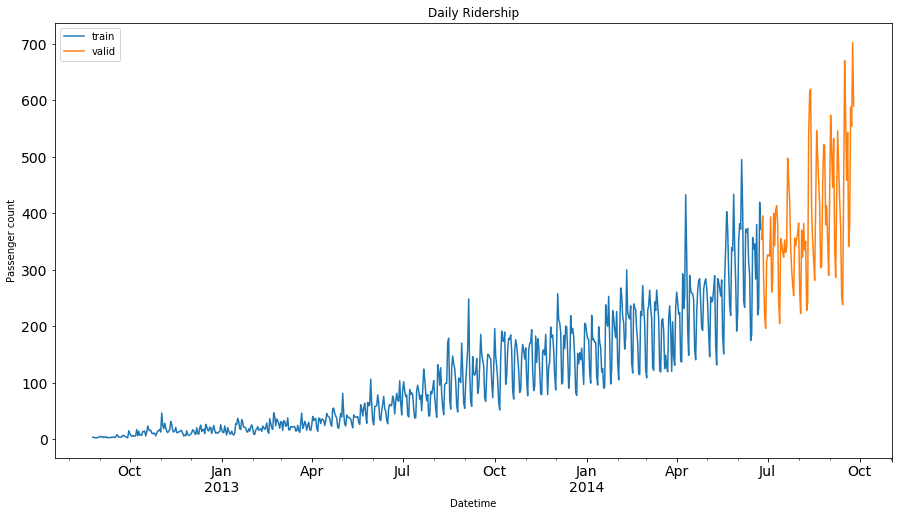

In [25]:
# Checking the train and validation split
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

Visualizing using Moving average with different values of p for MA(p), 
p = 10 (last 10 observations)
p = 20 (last 20 observations)
p = 50 (last 50 observations)

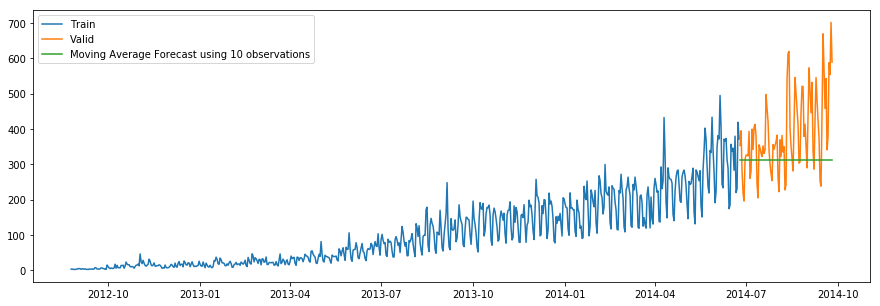

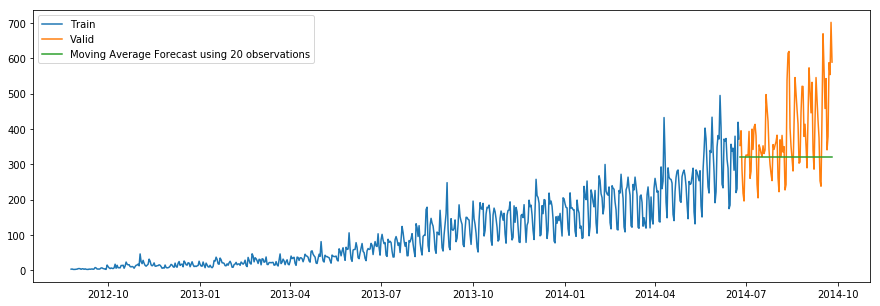

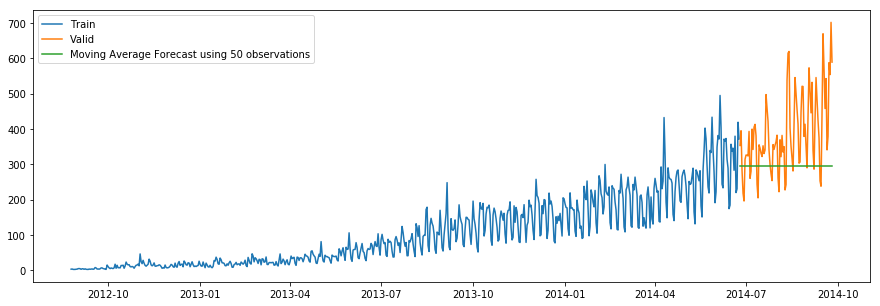

In [26]:
# Moving Average 
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations.
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()

y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] # average of last 20 observations.
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations')
plt.legend(loc='best')
plt.show()

y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] # average of last 50 observations.
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations')
plt.legend(loc='best')
plt.show()

In [27]:
# Calculating rms value
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast))
print(rms)

144.19175679986802


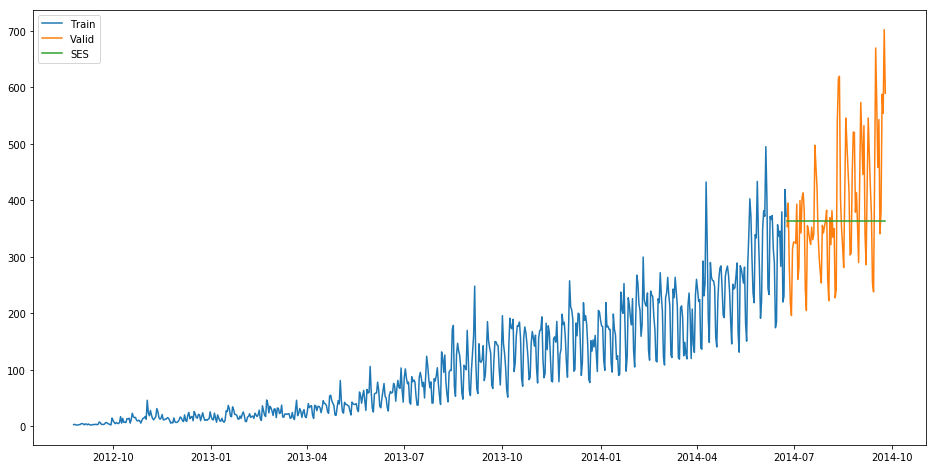

In [28]:
# Simple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [29]:
# calculating rms value
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES))
print(rms)

113.43708111884514


Now will visualize/forecast using Holt's Linear model

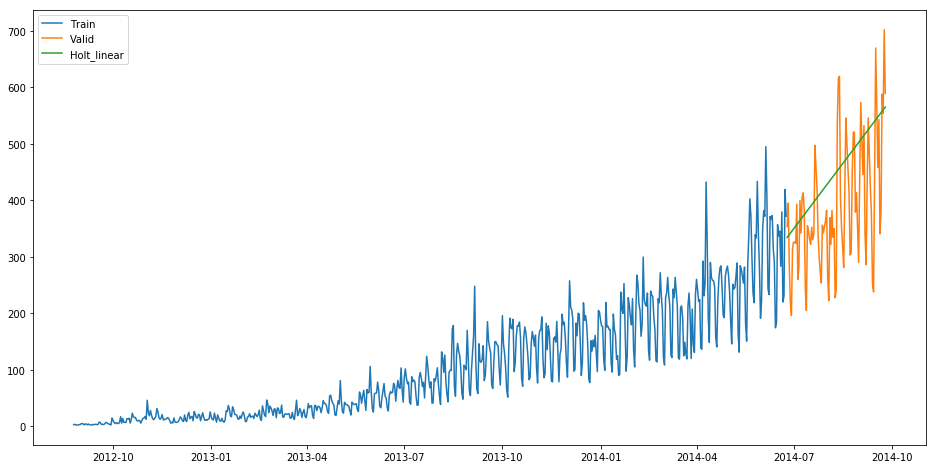

In [30]:
# Holt's Linear trend model
y_hat_avg = valid.copy()

fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [31]:
# calculating rms value
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear))
print(rms)

112.94278345314041


In [33]:
submission=pd.read_csv("Submission.csv")
submission.head()

,ID,Count


In [35]:
# Making predictions
predict=fit1.forecast(len(test))

In [36]:
test['prediction']=predict

In [37]:
# Calculating the hourly ratio of count
hourly['ratio']=hourly['Count']/hourly['Count'].sum()

# Grouping the hourly ratio
temp=hourly.groupby(['Hour'])['ratio'].sum()

# Groupby to csv format
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('GROUPby.csv')

temp2=pd.read_csv("GROUPby.csv")
temp2=temp2.drop('Hour.1',1)

# Merge Test and test_original on day, month and year
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')

# Converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24


Visualizing forecast using Holt winter's model

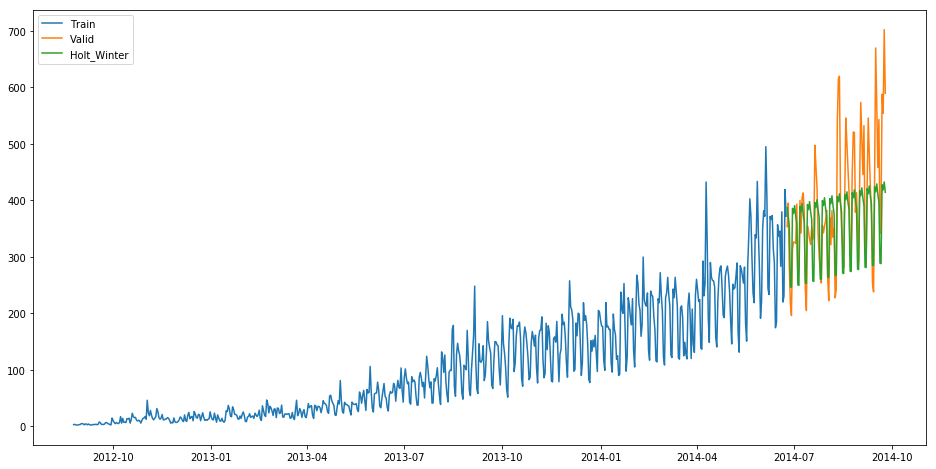

In [38]:
# Holt winter's model on daily time series
y_hat_avg = valid.copy()
modelExponentiel = ExponentialSmoothing(np.asarray(Train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',)
fit1 = modelExponentiel.fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot( Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [39]:
# Calculating rmse value
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter))
print(rms)

82.37826583279276


RMSE value of Holt winter's is much less than the Moving average model and bit lesser than Hol's Linear model.

In [40]:
predict = fit1.forecast(len(test))

In [41]:
test['prediction'] = predict

In [42]:
# Merging Test and test_original on day, month and year

merge = pd.merge(test, test_original, on=('day','month', 'year'), how='left')
merge['Hour'] = merge['Hour_y']
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')

# Converting the ratio to the original scale
prediction['Count'] = round(prediction['prediction']*prediction['ratio']*24)

In [43]:
prediction.head()

,ID_x,day,prediction,ID_y,Hour,ratio,Count
0,18299.5,26.0,387.357446,18288,0,0.044287,412.0
1,18299.5,26.0,387.357446,18289,1,0.035343,329.0
2,18299.5,26.0,387.357446,18290,2,0.029911,278.0
3,18299.5,26.0,387.357446,18291,3,0.024714,230.0
4,18299.5,26.0,387.357446,18292,4,0.020802,193.0


In [44]:
submission = prediction.drop(['day','Hour','ratio','prediction','ID_x'],axis=1)

# Converting the final submission to csv format
df = pd.DataFrame(submission)
df.rename(columns = {'ID_y':'ID'},inplace=True)
df.to_csv('Holt_Winters.csv',index=False) # Savig results for holt winters prediction to csv file

In [45]:
temp_hour_month = pd.DataFrame(hourly.groupby(['month','Hour'])['Count'].aggregate(['sum']))
temp_month = pd.DataFrame(hourly.groupby('month').Count.sum())
temp3 = pd.merge(temp_hour_month.reset_index(),temp_month.reset_index(),on='month').set_index(['month','Hour'])
temp3['ratio'] = temp3['sum']/temp3['Count']
pd.DataFrame(temp3, columns=['Hour','ratio']).to_csv('GROUPby2.csv')
temp3=pd.read_csv("GROUPby2.csv")
temp3=temp3.drop('Hour.1',1)
# Merge Test and test_original on day, month and year
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year', 'Datetime','Hour_x','Hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp3, on=('month','Hour'), how='left')
# Converting the ratio to the original scale
prediction['Count']=round(prediction['prediction']*prediction['ratio']*24)

In [46]:
submission = prediction.drop(['day','Hour','ratio','prediction','ID_x'],axis=1)

# Converting the final submission to csv format
df = pd.DataFrame(submission)
df.rename(columns = {'ID_y':'ID'},inplace=True)
df.to_csv('Holt_Winters_groupby2.csv',index=False) # Savig grouped results for holt winters prediction to csv file

Before continuing with the building forecast model first we have to check the stationarity of data.
We can continue building model if series is stationary.
If it is not stationary, then first wwe'll have to make it stationary by differntiating.

In [52]:
# Function for checking stationarity of data (Dickey Fuller test for stationarity)
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series.rolling(timeseries, 24).mean()
    rolstd = pd.Series.rolling(timeseries, 24).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [48]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

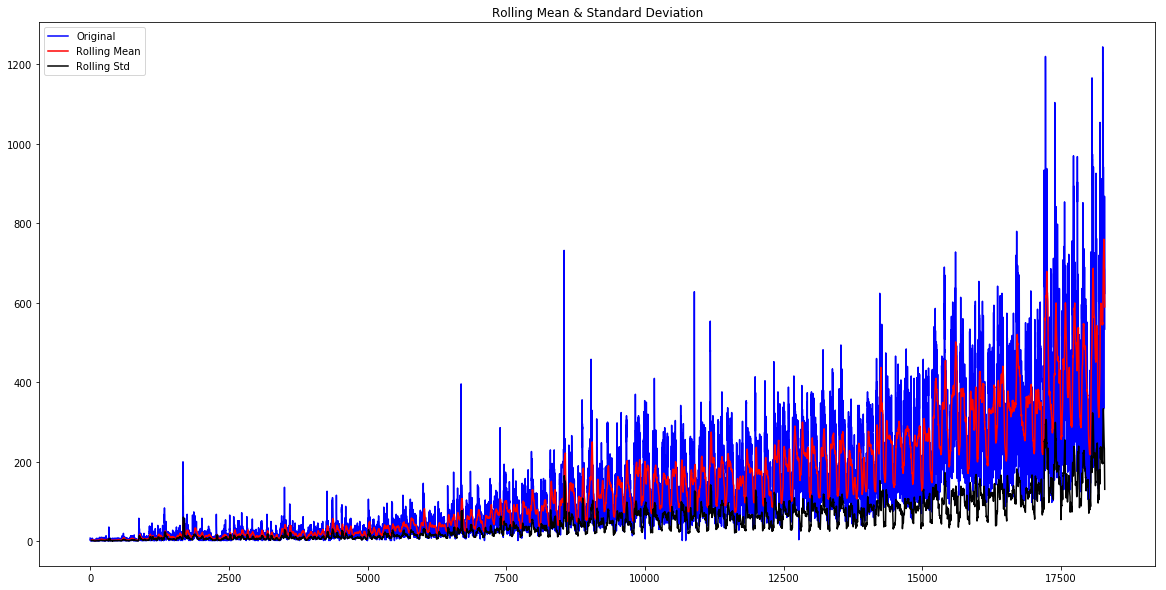

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (10%)              -2.566854
Critical Value (5%)               -2.861698
Critical Value (1%)               -3.430709
dtype: float64


In [53]:
test_stationarity(train_original['Count'])

In [55]:
'''Make a Time Series Stationary'''
#Estimating & Eliminating Trend

Train_log = np.log(Train['Count'])
valid_log = np.log(valid['Count'])

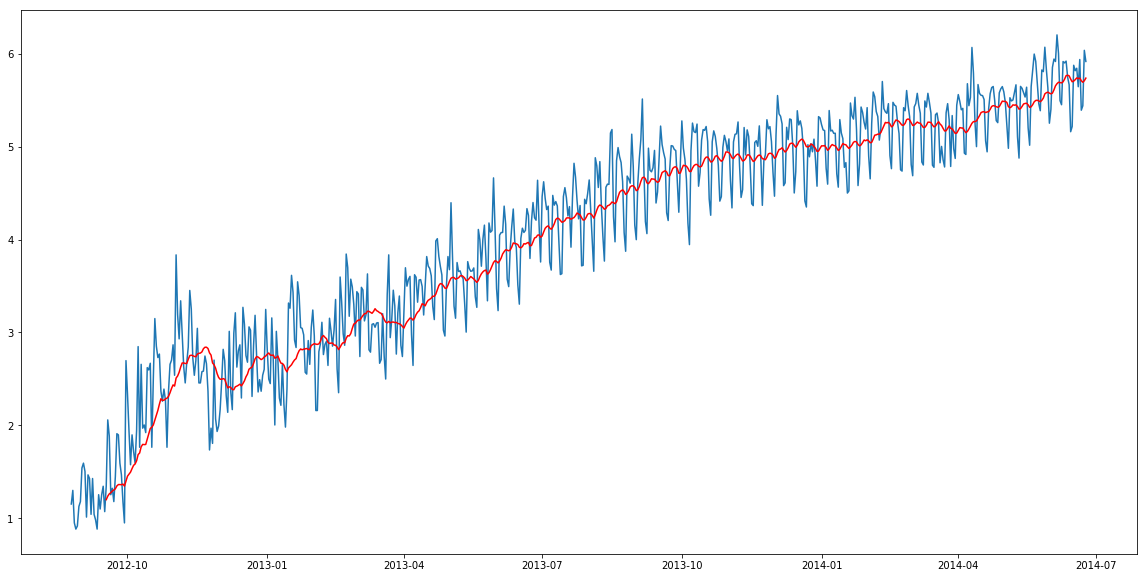

In [57]:
# Taking rolling mean
moving_avg = pd.Series.rolling(Train_log, 24).mean()
plt.plot(Train_log)
plt.plot(moving_avg, color = 'red')
plt.show()

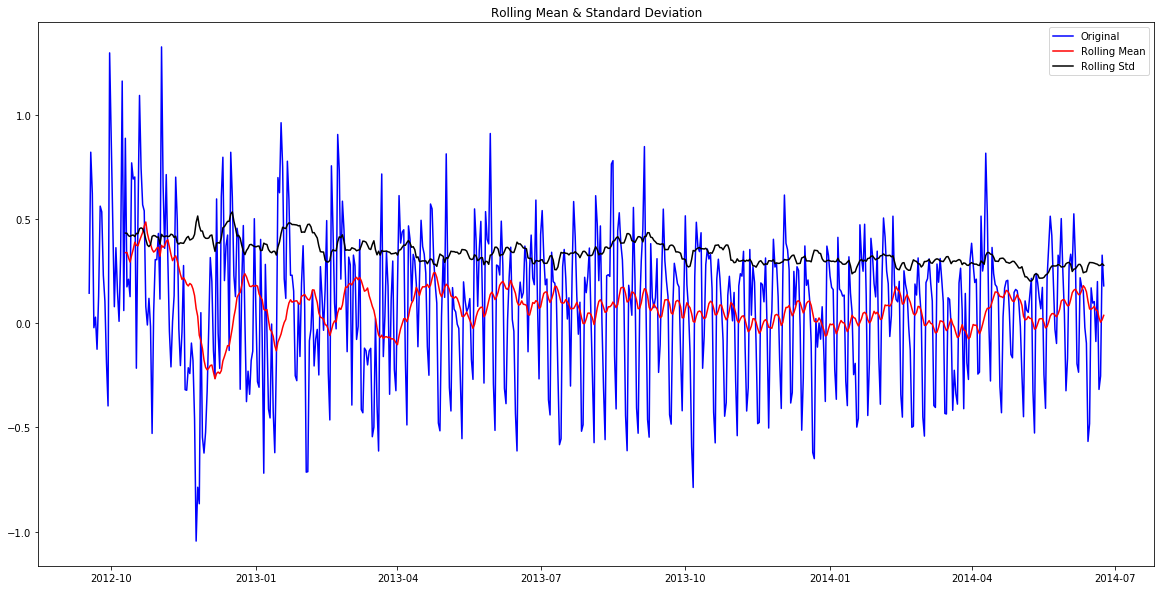

Results of Dickey-Fuller Test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (10%)          -2.569239e+00
Critical Value (5%)           -2.866175e+00
Critical Value (1%)           -3.440856e+00
dtype: float64


In [59]:
# Removing trend
train_log_moving_avg_diff = Train_log - moving_avg

train_log_moving_avg_diff.dropna(inplace = True)
test_stationarity(train_log_moving_avg_diff)

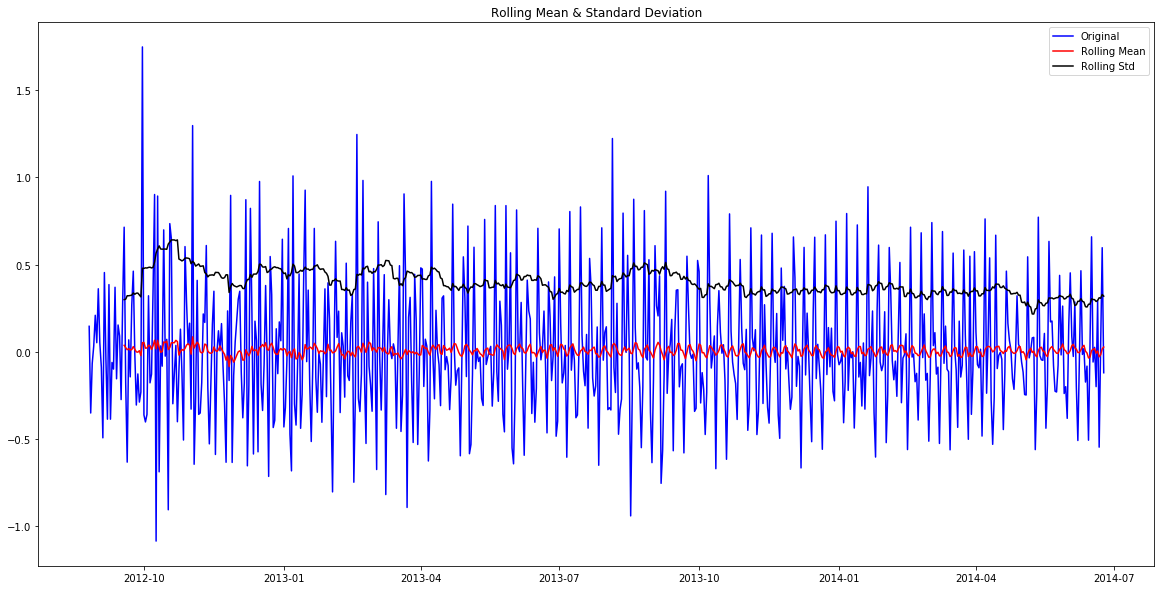

Results of Dickey-Fuller Test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (10%)          -2.569151e+00
Critical Value (5%)           -2.866011e+00
Critical Value (1%)           -3.440482e+00
dtype: float64


In [60]:
train_log_diff = Train_log - Train_log.shift(1)
test_stationarity(train_log_diff.dropna())

In [61]:
Train_log.head()

Datetime
2012-08-25    1.152680
2012-08-26    1.299283
2012-08-27    0.949081
2012-08-28    0.882389
2012-08-29    0.916291
Freq: D, Name: Count, dtype: float64

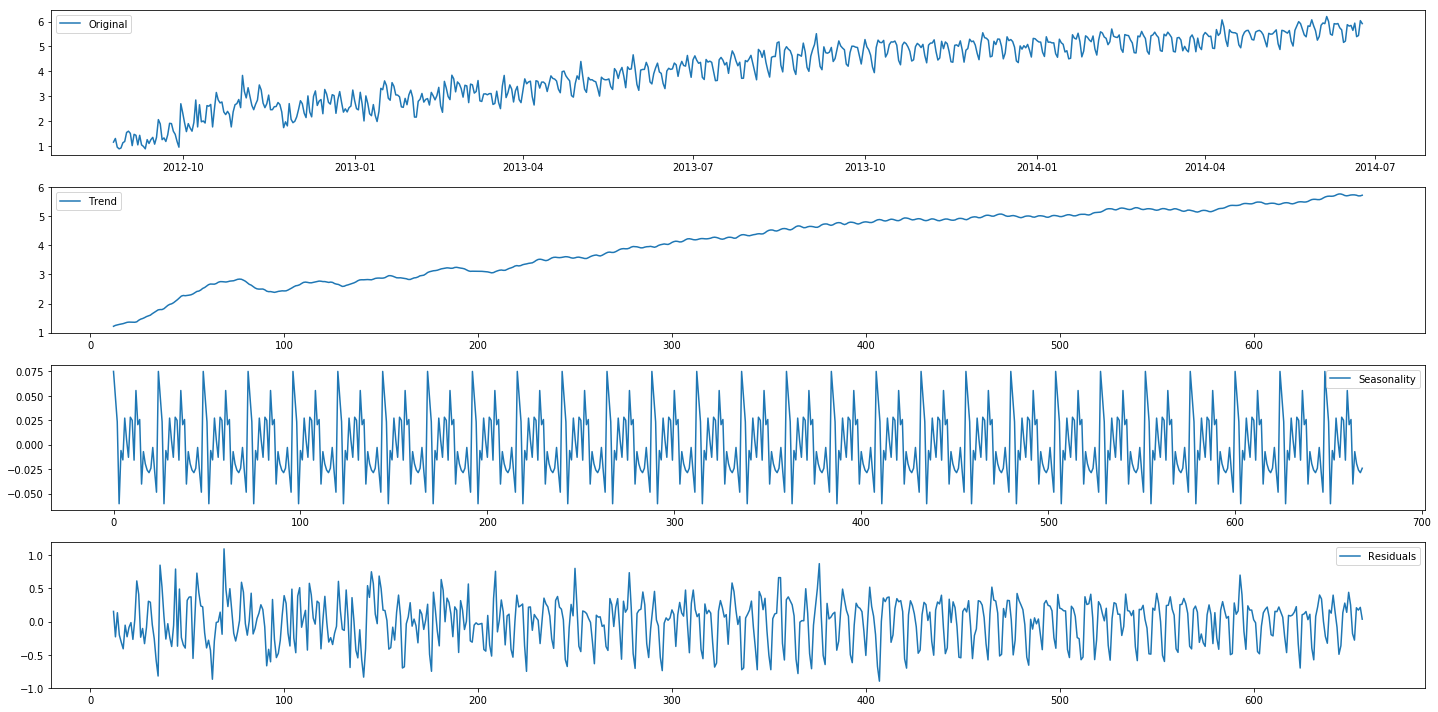

In [62]:
# Decomposing the time series into trend, seasonality and residual
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

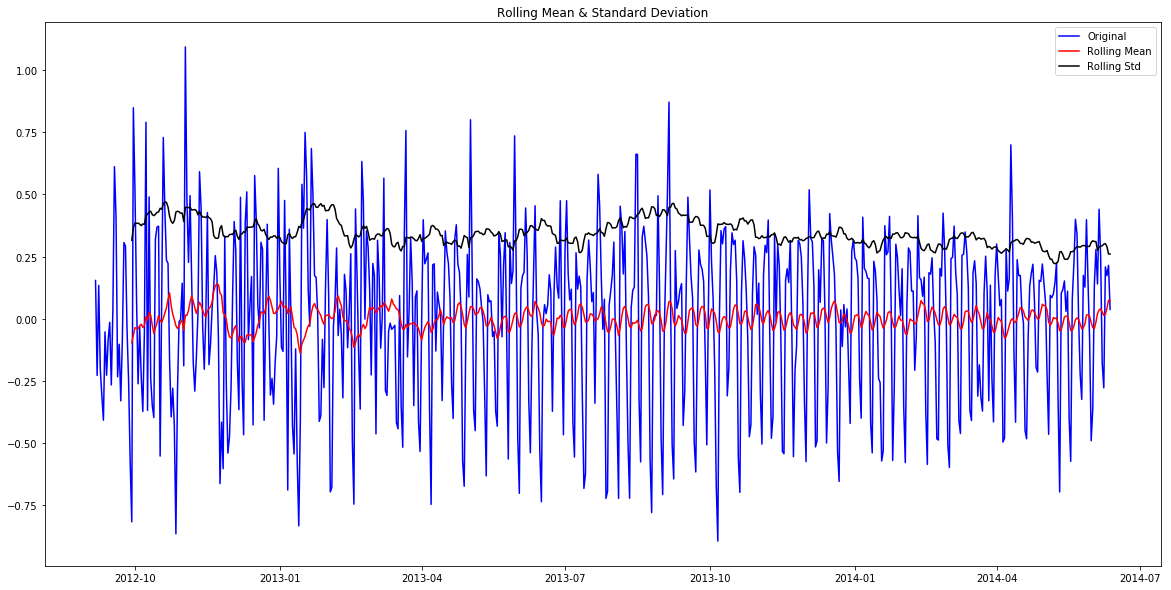

Results of Dickey-Fuller Test:
Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (10%)          -2.569243e+00
Critical Value (5%)           -2.866183e+00
Critical Value (1%)           -3.440873e+00
dtype: float64


In [63]:
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace=True)
test_stationarity(train_log_decompose[0])


Visualizing ACF(autocorrelation Function) and PACF(Partial ACF) graph,
these graphs will help in deciding the values of p and q while builidng MA, AR, ARIMA models.
p = number of previous observations
q = number of previious error values

In [64]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train_log_diff.dropna(), nlags=25)
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

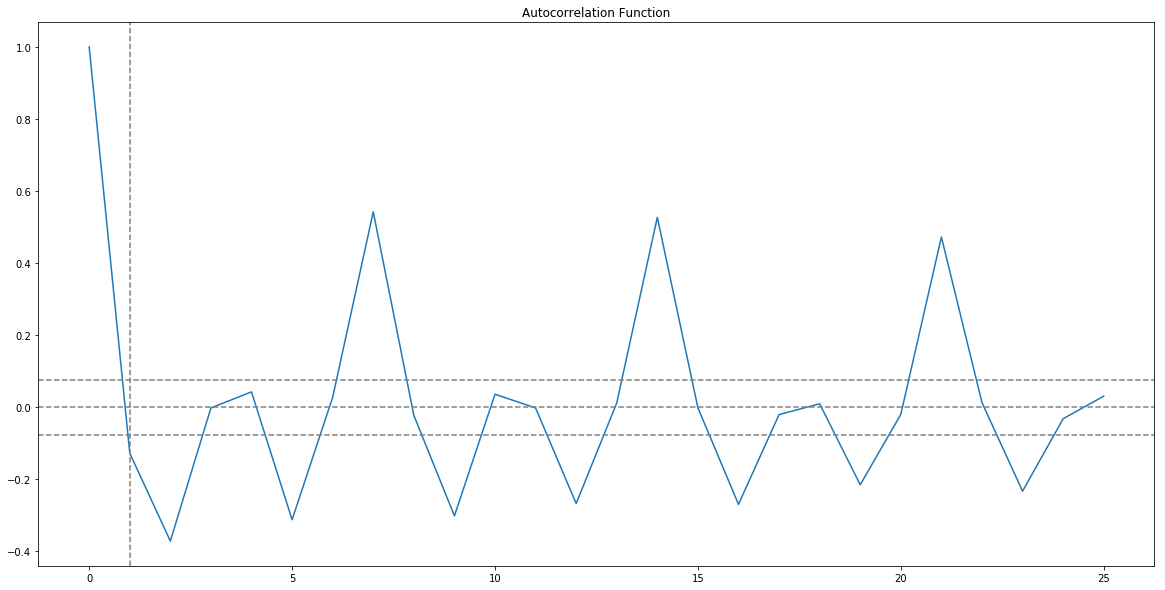

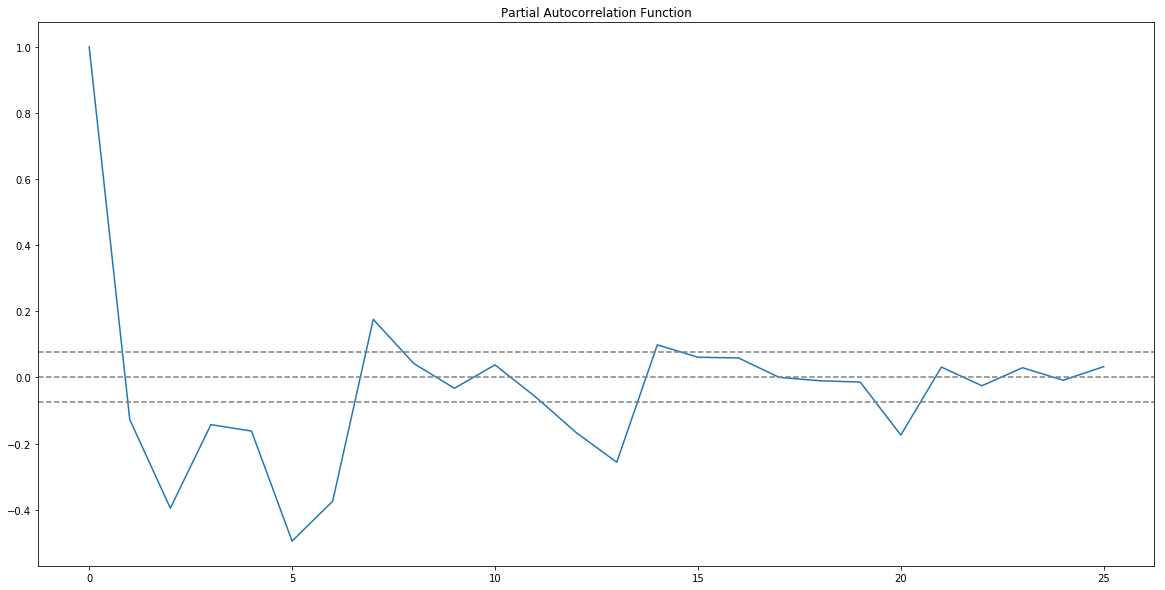

In [65]:
# Plotting ACF and PACF

plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axvline(x=1,linestyle='--',color='gray')

plt.title('Autocorrelation Function')
plt.show()
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()


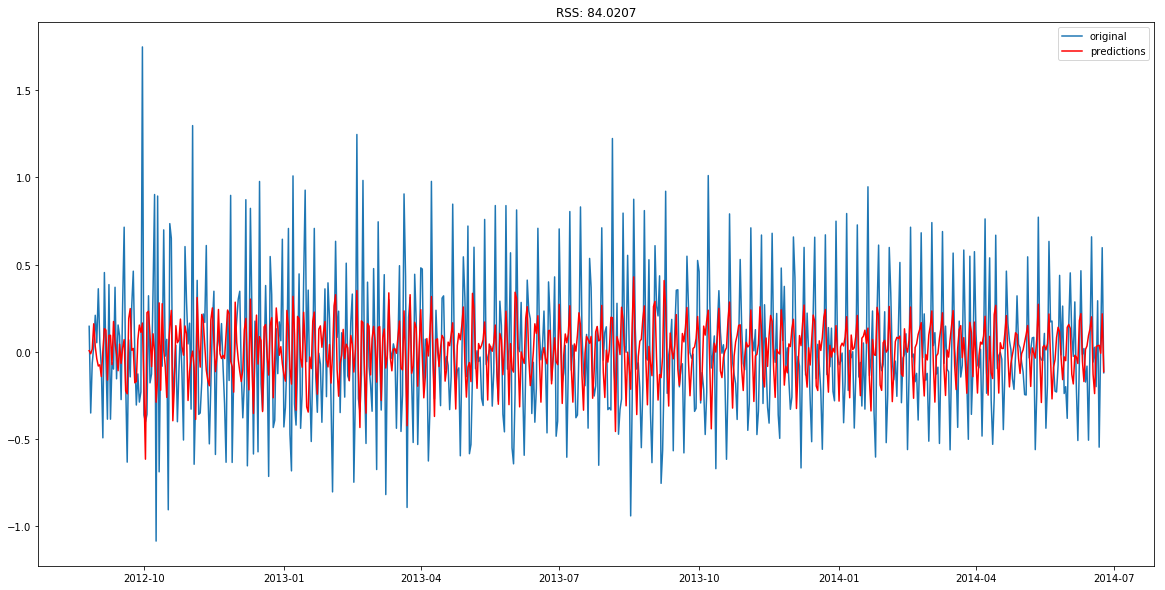

In [74]:
#Building AR, ARIMA Models

from statsmodels.tsa.arima_model import ARIMA

# AR model
model = ARIMA(Train_log, order=(2, 1, 0))  # here the q value is zero since it is just the AR model
results_AR = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_AR.fittedvalues, color='red', label='predictions')
plt.legend(loc='best')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-train_log_diff.dropna())**2))
plt.show()

In [67]:
# predicting using AR model
AR_predict = results_AR.predict(start="2014-06-25", end="2014-09-25")
AR_predict = AR_predict.cumsum().shift().fillna(0)
AR_predict1 = pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index)
AR_predict1 = AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)

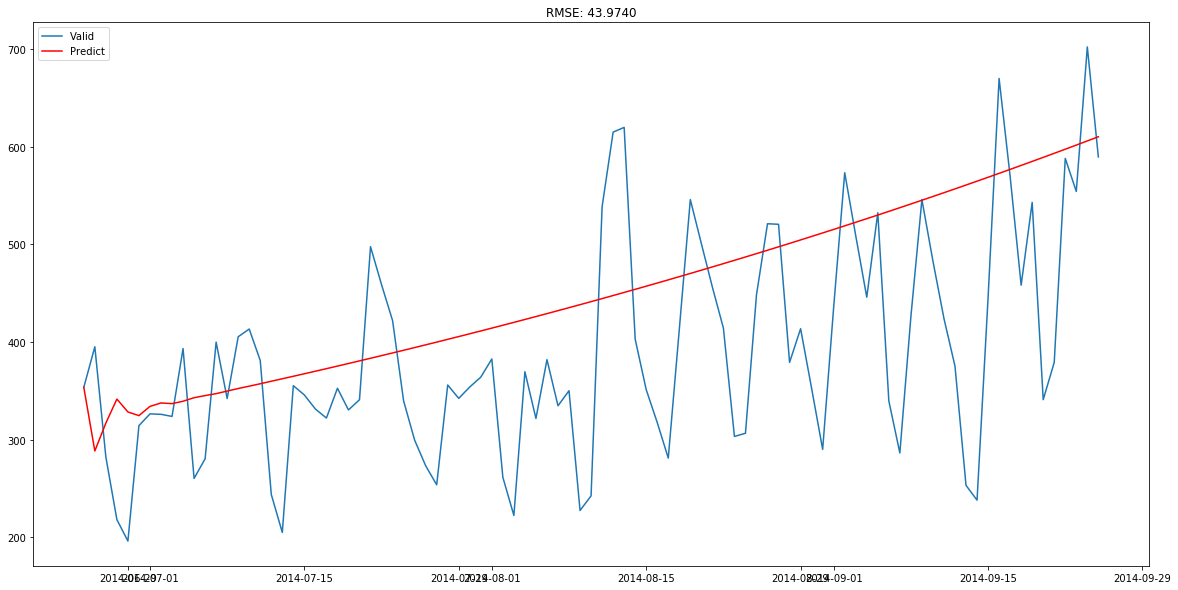

In [68]:
# Validating the AR model
plt.plot(valid['Count'], label = "Valid")
plt.plot(AR_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Count']))/valid.shape[0]))
plt.show()

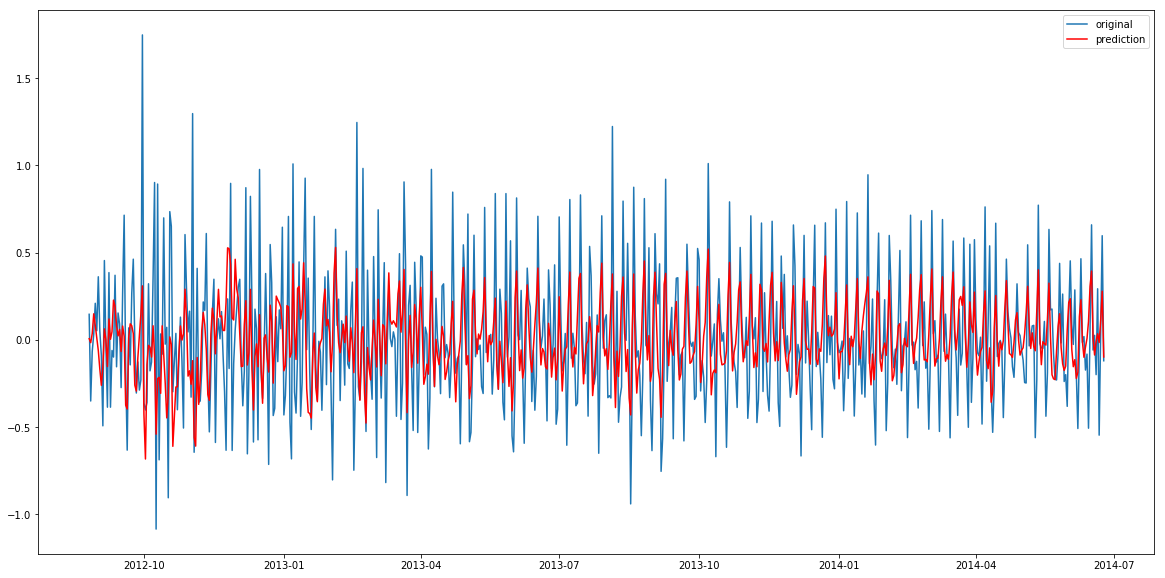

In [69]:
# MA model
ARIMA = ARIMA(Train_log, order=(0, 1, 2))  # here the p value is zero since it is just the MA model
results_MA = ARIMA.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_MA.fittedvalues, color='red', label='prediction')
plt.legend(loc='best')
plt.show()

In [70]:
# predicting using MA model
MA_predict=results_MA.predict(start="2014-06-25", end="2014-09-25")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict = np.exp(MA_predict1)

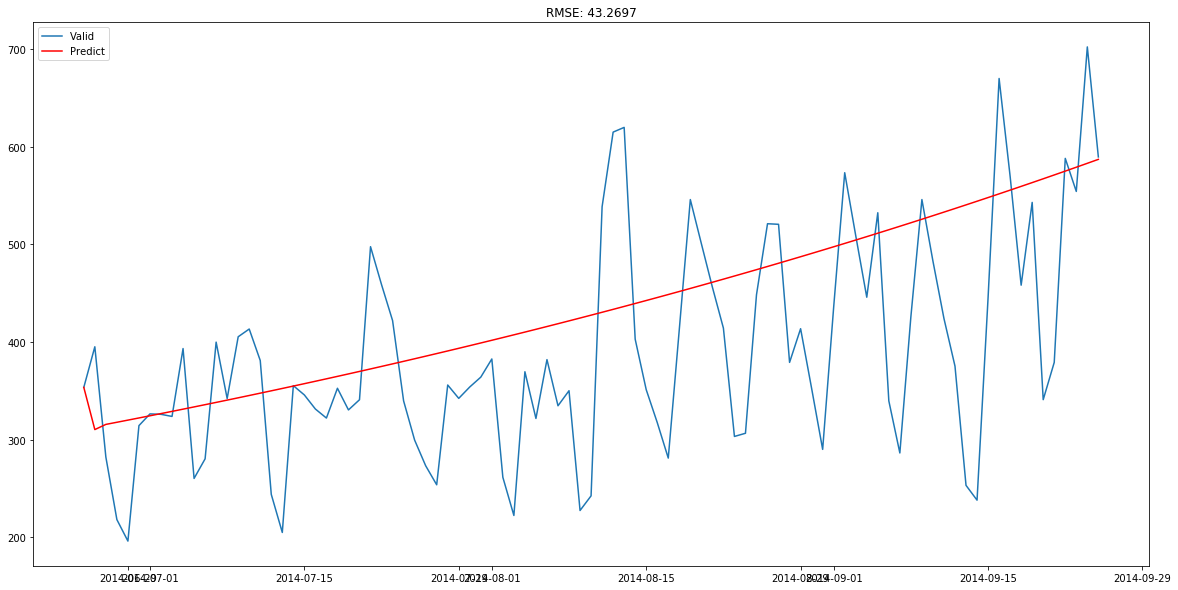

In [71]:
# validating the MA model
plt.plot(valid['Count'], label = "Valid")
plt.plot(MA_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['Count']))/valid.shape[0]))
plt.show()

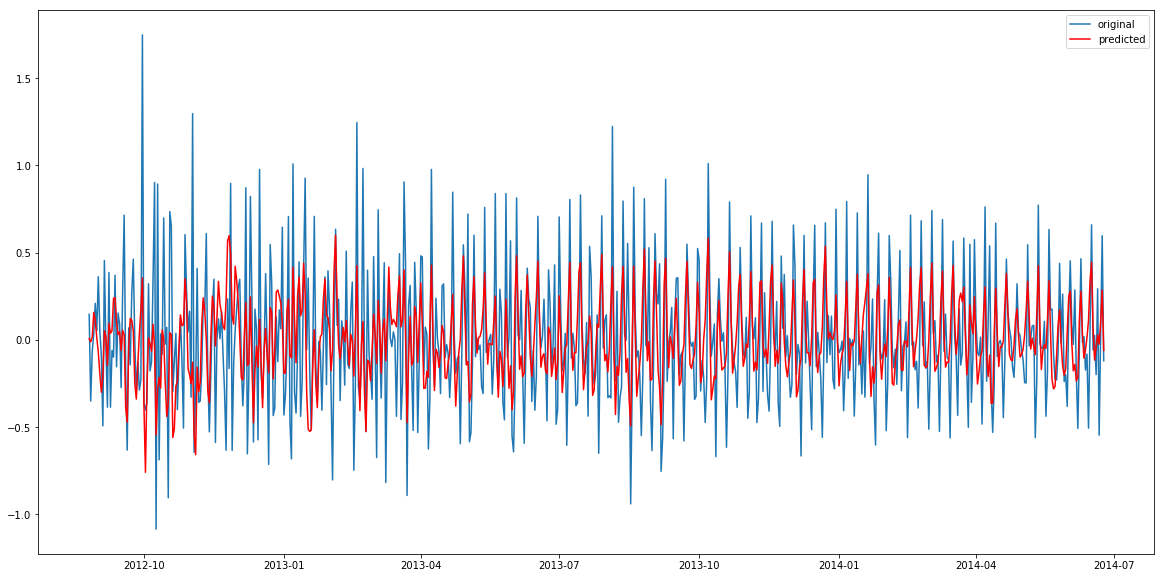

In [75]:
# ARIMA model
model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted')
plt.legend(loc='best')
plt.show()

As we removed trend and seasonality for making model stationary, we'll have to convert forecasted values to original scale

In [76]:
# Rescaling the values to otriginal
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

In [77]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

In [78]:
# predicting using ARIMA
ARIMA_predict_diff=results_ARIMA.predict(start="2014-06-25", end="2014-09-25")

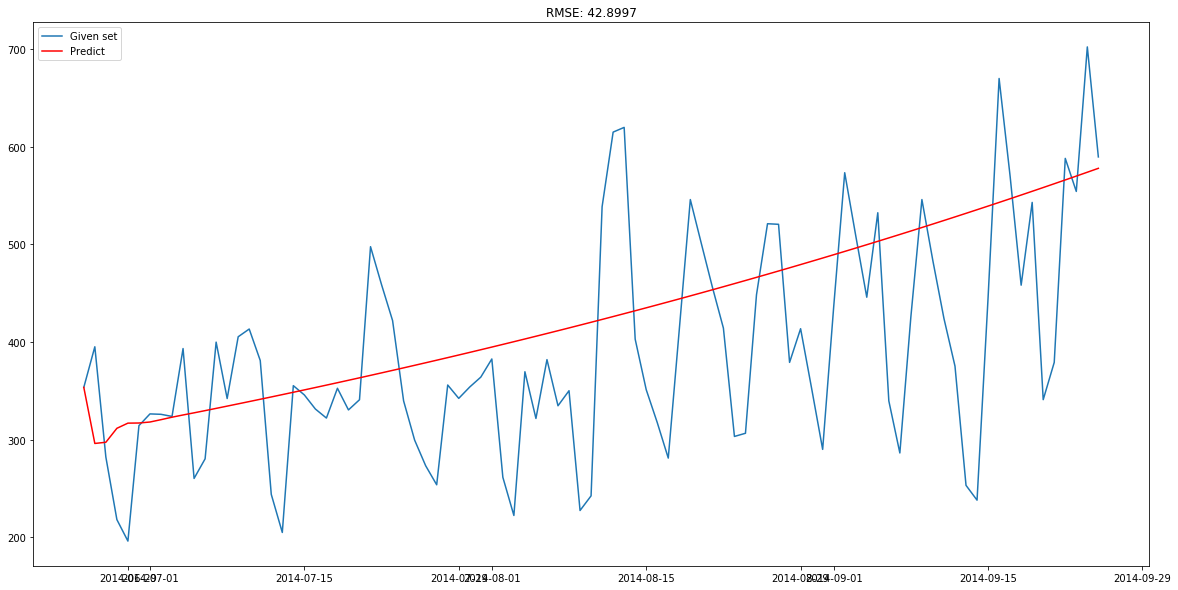

In [79]:
# validating the predictions
check_prediction_diff(ARIMA_predict_diff, valid)

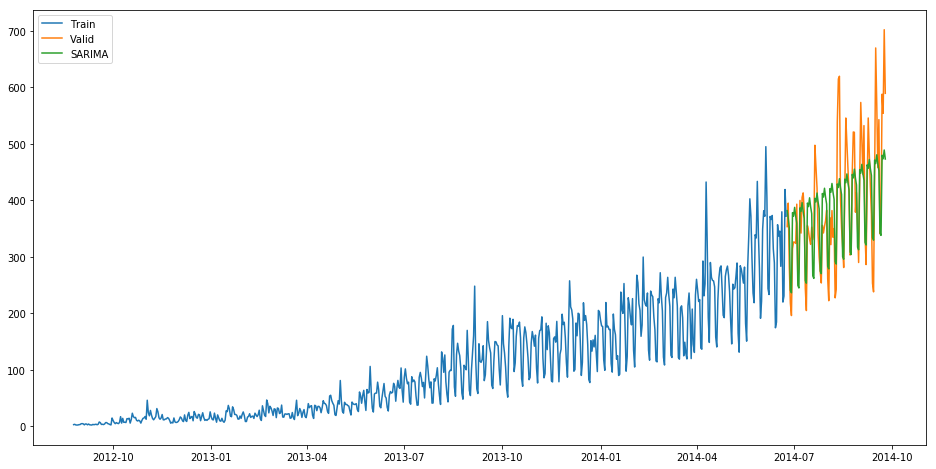

In [80]:
# Sarimax Model

import statsmodels.api as sm

# SARIMAX model
y_hat_avg = valid.copy()
SARIMA = sm.tsa.statespace.SARIMAX(train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7))
fit1 = SARIMA.fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2014-6-25", end="2014-9-25", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [81]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SARIMA))
print(rms)

68.68860748836742


In [87]:
# Predicting using SARIMAX model
predict=fit1.predict(start="2014-9-26", end="2015-4-26", dynamic=True)

In [83]:
test['prediction']=predict

In [84]:
# Merge Test and test_original on day, month and year
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')

# Converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24

In [85]:
submission = prediction.drop(['day','Hour','ratio','prediction'],axis=1)

# Saving final submission prediction in csv file
pd.DataFrame(submission, columns=['ID','Count']).to_csv('SARIMAX.csv')